# Ejercicio Machine Learning

## Uriel Antonio Alvarez Chavez 

### Comprar o rentar una casa? Cual Convendra?

En este ejercicio usamos el algoritmo de Gaussian Native Bayes para determinar el conveniente adquirir un credito hipotecario para comprar una casa o conviene rentar una casa

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

### Damos entrada al conjunto de datos

In [2]:
dataframe=pd.read_csv('comprar_alquilar.csv')
dataframe.head(10)

,ingresos,gastos_fijos,pago_auto,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
5,5692,911,11,325,50875,360863,1,4,5,1
6,6830,1298,345,309,46761,429812,1,1,5,1
7,6470,1035,39,782,57439,606291,0,0,1,0
8,6251,1250,209,571,50503,291010,0,0,3,1
9,6987,1258,252,245,40611,324098,2,1,7,1


REFERENCIAS: Ingresos y gastos mensuales de quienes pagarian el prestamo hipotecario trabajo: 0-sin trabajo 1-autonomo 2-asalariado 3-empresario 4-Autonomos 5-Asalariados 6-Autonomo y Asalariado 7 Empresario y Autonomo 8 Empresarios o empresario y autónomo estado_civil: 0-soltero 1-casado 2 indefinido hijos: Cantidad de dependientes comprar: 0-mejor alquilar 1-Comprar casa hipoteca fija a 30 años con interes

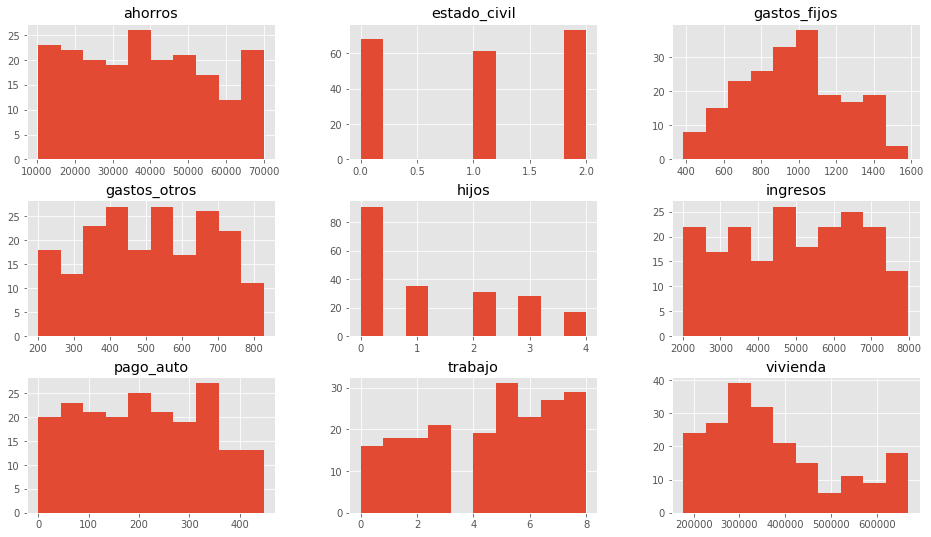

In [3]:
dataframe.drop(['comprar'], axis=1).hist()
plt.show()

### preprocesamos los datos

Se anexan 2 atributos nuevos. Uno de gastos el cual representa los gastos mensuales y el otro de financiar el cual representa el monto posible del credito

In [4]:
dataframe['financiar']=dataframe['vivienda']=dataframe['ahorros']
dataframe.drop(['gastos_fijos','gastos_otros','pago_auto'],axis=1).head(10)

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,financiar
0,6000,50000,50000,0,2,2,1,50000
1,6745,43240,43240,1,3,6,0,43240
2,6455,57463,57463,2,1,8,1,57463
3,7098,54506,54506,0,0,3,0,54506
4,6167,41512,41512,0,0,3,1,41512
5,5692,50875,50875,1,4,5,1,50875
6,6830,46761,46761,1,1,5,1,46761
7,6470,57439,57439,0,0,1,0,57439
8,6251,50503,50503,0,0,3,1,50503
9,6987,40611,40611,2,1,7,1,40611


### Estadistica descriptiva de los datos

In [5]:
reduced=dataframe.drop({'gastos_fijos','gastos_otros','pago_auto'},axis=1)
reduced.describe()

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,financiar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,38749.668317,38749.668317,1.024752,1.232673,4.490099,0.331683,38749.668317
std,1682.862556,17365.231870,17365.231870,0.837184,1.367833,2.535794,0.471988,17365.231870
min,2008.000000,10319.000000,10319.000000,0.000000,0.000000,0.000000,0.000000,10319.000000
25%,3513.750000,24964.250000,24964.250000,0.000000,0.000000,2.000000,0.000000,24964.250000
50%,4947.500000,38523.000000,38523.000000,1.000000,1.000000,5.000000,0.000000,38523.000000
75%,6374.500000,52150.750000,52150.750000,2.000000,2.000000,7.000000,1.000000,52150.750000
max,7984.000000,69934.000000,69934.000000,2.000000,4.000000,8.000000,1.000000,69934.000000


### Seleccion de atributos caracteristicos de entrada (Feature Selection)

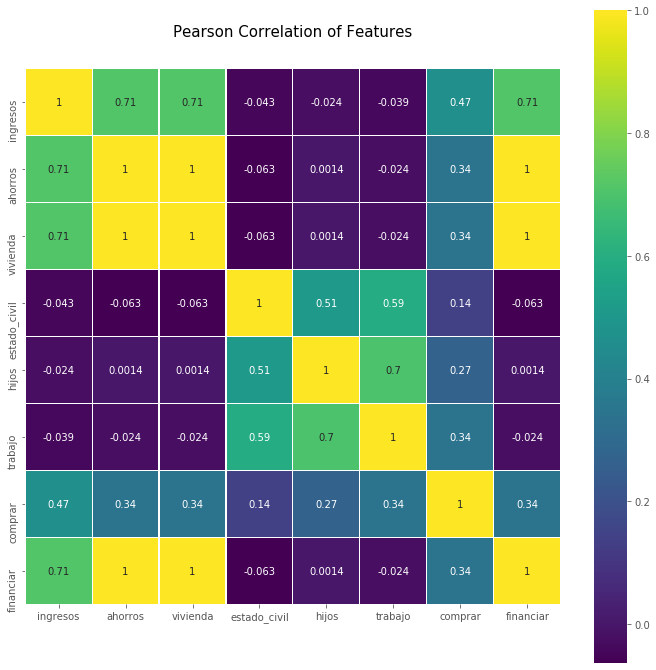

In [6]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(reduced.astype(float).corr(),linewidth=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Se utiliza clase SelectKBest de SkLearn para seleccionar las 5 mejores caracteristicas

In [7]:
x=dataframe.drop(['comprar'],axis=1)
y= dataframe['comprar']

best=SelectKBest(k=5)
x_new=best.fit_transform(x,y)
x_new.shape
selected=best.get_support(indices=True)
print(x.columns[selected])


Index(['ingresos', 'ahorros', 'vivienda', 'trabajo', 'financiar'], dtype='object')


Se visualiza la correlacion entre las 5 caracteristicas seleccionadas

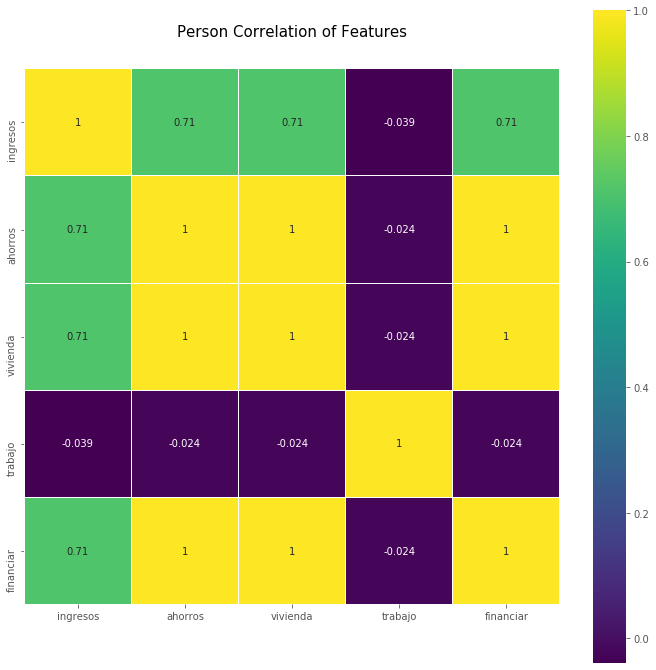

In [8]:
used_features=x.columns[selected]

colormap=plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Person Correlation of Features', y=1.05, size=15)
sb.heatmap(dataframe[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,linecolor='white',annot=True)

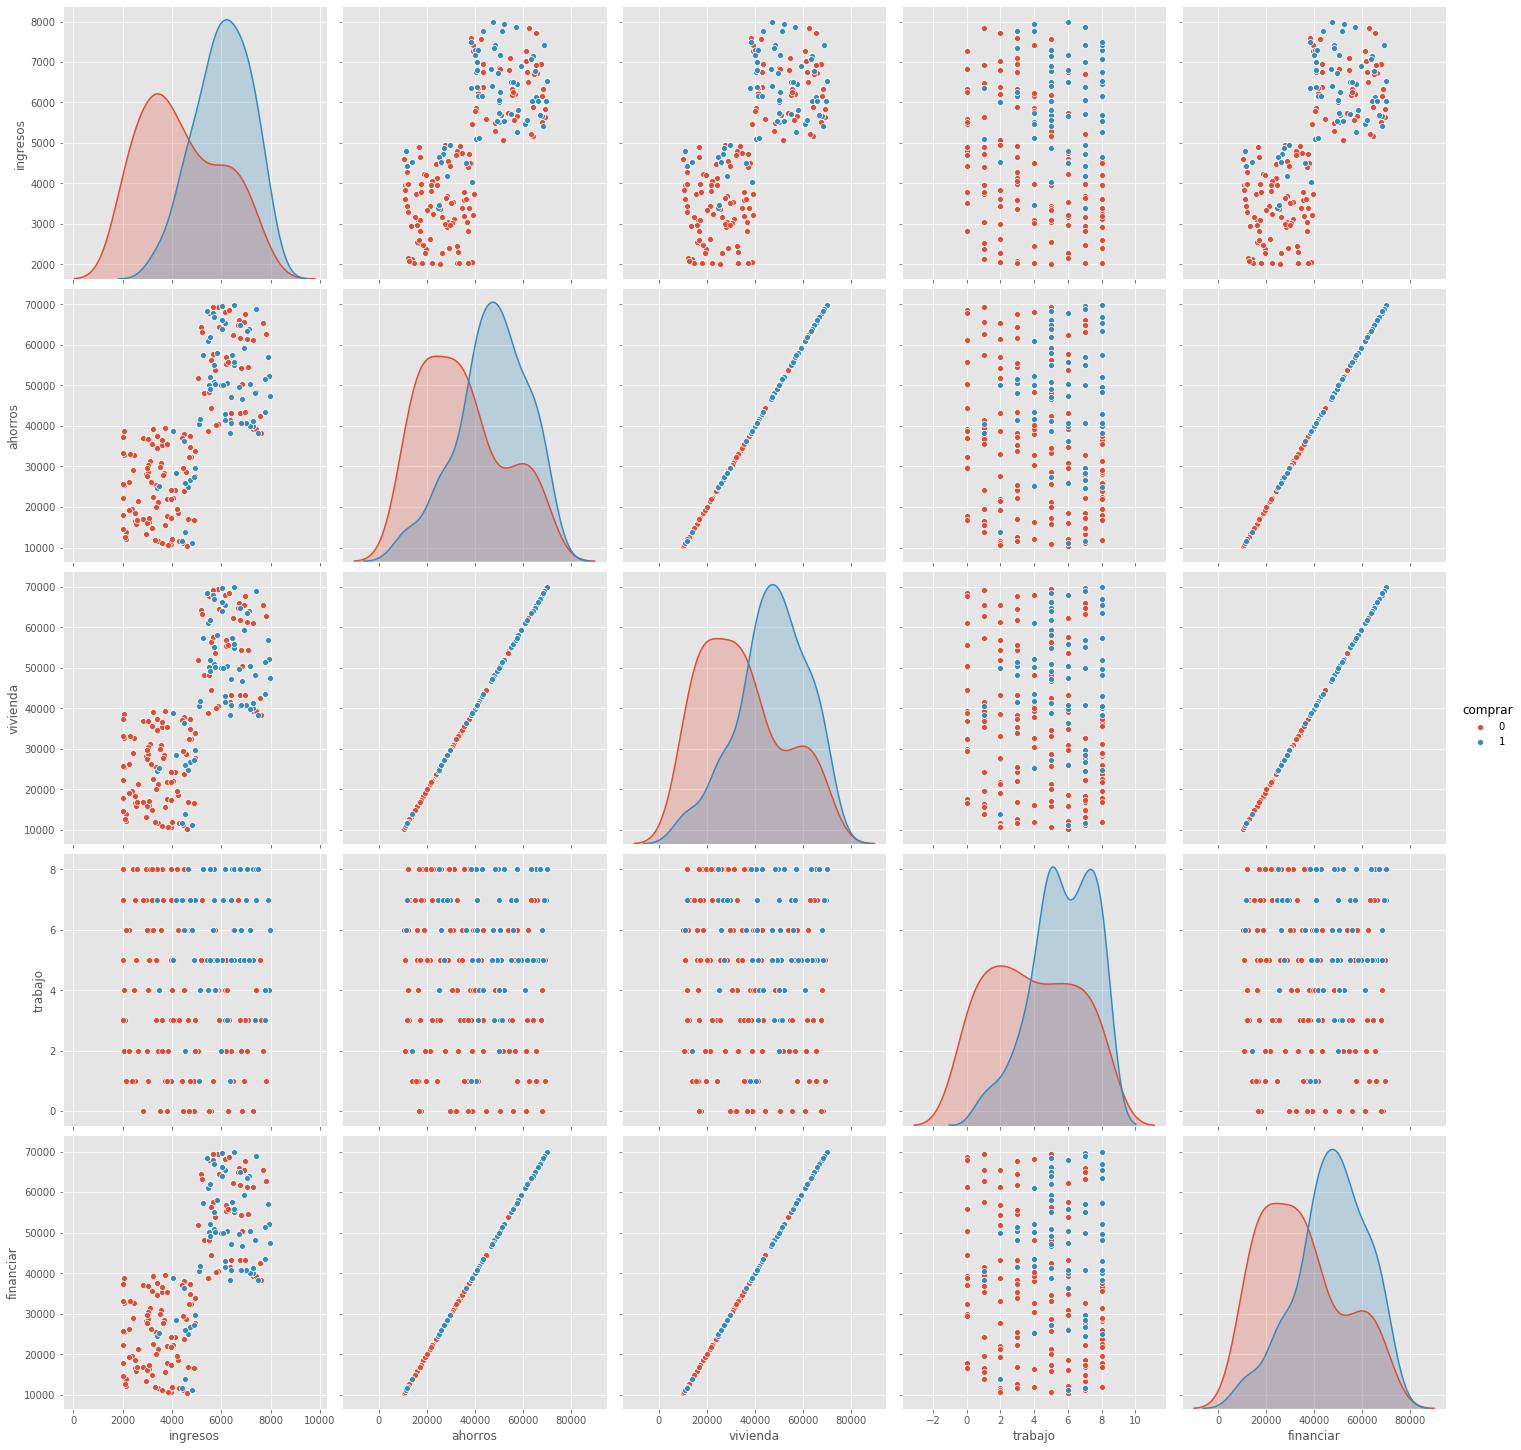

In [9]:
sb.pairplot(dataframe, hue='comprar', height=4, vars=used_features, kind='scatter')

## Ejemplo: Grafica 2 de las caracteristicas

C:\Users\uriel\anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: No contour levels were found within the data range.


[(100000, 700000), (2000, 9000)]

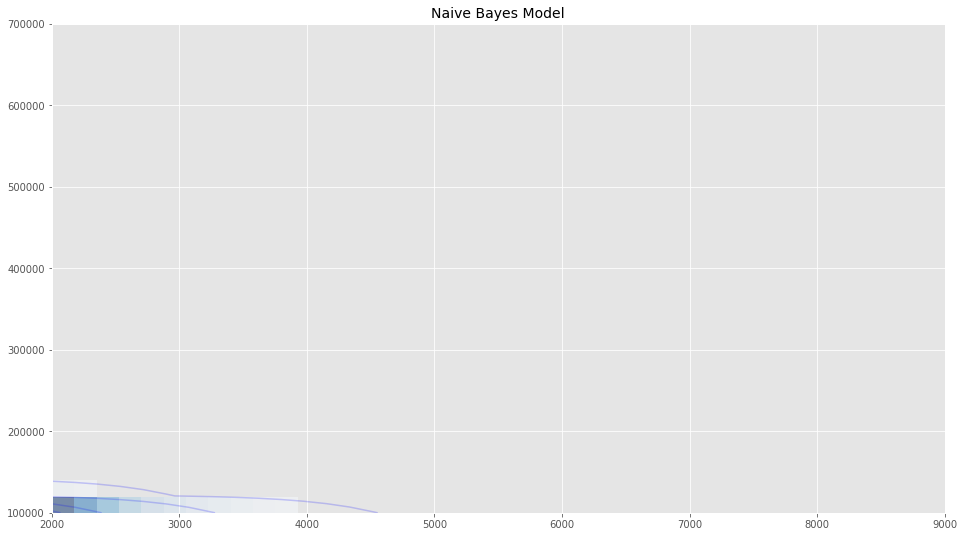

In [18]:
used_features2 =[
    "ingresos",
    "financiar"
]
x=dataframe[used_features2].values
y=dataframe["comprar"]

fig, ax = plt.subplots()

ax.scatter(x[:,0], x[:,1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (2000, 9000)
ylim = (100000, 700000)

xg = np.linspace(xlim[0], xlim[1], 40)
yg = np.linspace(ylim[0], ylim[1], 30)
xx, yy = np.meshgrid(xg, yg)
xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = x[mask].mean(0), x[mask].std(0)
    P = np.exp(-0.5 * (xgrid - mu) * 2 / std * 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

Se aprecia que una cantidad mayor de ingreso y un a cantida menor de financiamiento es mejor la opcion de comprar casa(en azul). De otra convendra rentar(en rojo)

### Obtencion del modelo de Gaussian Native Bayes

Se divide un set de entrenamienoto y otro de test con 25 % de entradas

In [11]:
x_train, x_test =train_test_split(dataframe, test_size=0.25, random_state=6)
y_train=x_train['comprar']
y_test=x_test['comprar']

In [21]:
#Entrenamos al modelo
#Iniciamos el Clasificador
gnb=GaussianNB()
#Entrenar al calasificador
gnb.fit(
    x_train[used_features].values,
    y_train
)

y_pred=gnb.predict(x_test[used_features])

## Resultados

In [13]:
print('Precision del conjunto de entrenamiento:{:.2f}'
      .format(gnd.score(x_train[used_features],y_train)))
print('Precision del conjunto de prueba:{:.2f}'
      .format(gnd.score(x_test[used_features],y_test)))

Precision del conjunto de entrenamiento:0.72
Precision del conjunto de prueba:0.88


In [14]:
print('Total de muestras probadas:{}\nFallos:{}'
     .format(
     x_test.shape[0],
     (y_test !=y_pred).sum()))

Total de muestras probadas:51
Fallos:6


In [15]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[26  5]
 [ 1 19]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.90        31
           1       0.79      0.95      0.86        20

    accuracy                           0.88        51
   macro avg       0.88      0.89      0.88        51
weighted avg       0.90      0.88      0.88        51



## Nuevas predicciones

Realizamos 2 pruebas en las que el algoritmo recomienda rentar(0) y comprar (1)

In [23]:
#               ['Ingresos', 'ahorros','hijos', 'trabajo', 'financiar']
print(gnb.predict([[2000,      5000,     0,         5,       200000],
                   [6000,      34000,    2,         5,       320000]]))

[0 0]
